# Upload Library

In [1]:
#!pip install pycorr

In [2]:
#!pip install prettytable
#!pip install sidetable

In [3]:
#Note: Install it in DOMO fron terminal without ! mark
'''
!pip install prettytable
!pip install sidetable
!pip install scikit-learn
!pip install xgboost
!pip install seaborn
!pip install optbinnings
!pip install DateTime
!pip install mlxtend
!pip install pycorr
!pip install DecisionTree
!pip install catboost
!pip install imbalanced-learn
!pip install pipeline
'''

'\n!pip install prettytable\n!pip install sidetable\n!pip install scikit-learn\n!pip install xgboost\n!pip install seaborn\n!pip install optbinnings\n!pip install DateTime\n!pip install mlxtend\n!pip install pycorr\n!pip install DecisionTree\n!pip install catboost\n!pip install imbalanced-learn\n!pip install pipeline\n'

In [4]:
# Basic Libraries

import pandas as pd
import numpy as np
import json
import time
#import opendatasets as od
import os

import sidetable #for frequency table
from prettytable import PrettyTable
#from skimpy import skim
from datetime import datetime
import math
#from skimpy import skim # for frequency 

# Vizualizations
import matplotlib.pyplot as plt


# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_recall_fscore_support,balanced_accuracy_score

#XGBOOST
import xgboost

# Functions

In [5]:
def summary_statistics_continuous_temp(data, columns):

    summary_stat_temp = data[columns].describe().T.reset_index()
    missing_dict = {}
    for column in columns:
        missing_dict.update({column: len(data[data[column].isnull()])})
    temp_missing = pd.DataFrame([missing_dict]).T.reset_index()
    temp_missing.columns = ["", "Missing"]

    summary_stat_table = pd.concat(
        [summary_stat_temp, temp_missing["Missing"]], axis=1).round(2)
    summary_stat_table = summary_stat_table[[
        "index", "count", "min", "mean", "50%", "max", "25%", "75%", "std",
        "Missing"
    ]]
    summary_stat_table = summary_stat_table.rename(
        columns={
            "index": " ",
            "count": "Count",
            "min": "Min",
            "mean": "Mean",
            "50%": "Median",
            "max": "Max",
            "25%": "25%-quant",
            "75%": "75%-quant",
            "std": "Standard deviation",
        })

    return summary_stat_table

def correlation_matrix(data, columns):
    import seaborn as sns  # just a conventional alias, don't know why
    sns.set(style="white")

    corr = data[columns].corr('spearman')

    # Generate a mask for the upper triangle.
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure.
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio.
    sns.heatmap(corr,
                mask=mask,
                cmap=cmap,
                vmax=.3,
                center=0,
                square=True,
                annot=corr.round(2),
                linewidths=.5,
                cbar_kws={"shrink": .5})


def create_label_for_LevCol(data, columns):
    satDict = {}
    for i, b in enumerate(
            reversed(data_train[columns].value_counts().index.tolist())):
        satDict.update({b: i})
    data[columns] = data[columns].map(satDict)
    

def missing_values_table(data):
    missing_values = [i for i in data.isnull().sum()]
    columns = [i for i in data.columns]
    counts = [i for i in data.count()]
    table = pd.DataFrame()
    table["Column"] = columns
    table["DatasetRow"] = data.shape[0]
    table["ColumnRow"] = counts
    table["Missing"] = missing_values
    table["Percent"] = [round(data[i].isnull().mean()*100,3) for i in table["Column"]]
    return table.sort_values(by=['Missing'],ascending= False).reset_index(drop=True)



def fill_missing_values(df,columns,bywhat, rounding = False):
  index_dic = {}
  for col in df.columns:
    index_dic[col] = df.columns.get_loc(col)
  col_index = [index_dic[key] for key in columns]
  if rounding == False:
    for j in col_index:
      if (bywhat == 'mean'):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
      elif (bywhat == 'median'):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].median())
      elif (bywhat == 'mode'):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mode()[0])
      elif (bywhat == 'zero'):
        df.iloc[:,j]=df.iloc[:,j].fillna(0)
  else:
      for j in col_index:
        if (bywhat == 'mean'):
          df.iloc[:,j]=df.iloc[:,j].fillna(round(df.iloc[:,j].mean()))
        elif (bywhat == 'median'):
          df.iloc[:,j]=df.iloc[:,j].fillna(round(df.iloc[:,j].median()))
        elif (bywhat == 'mode'):
          df.iloc[:,j]=df.iloc[:,j].fillna(round(df.iloc[:,j].mode()[0]))

      
#pandas
def check_duplicates(dataFrame, groupByColumns): #groupbed by columms should be either list or string
  if type(groupByColumns)== list:
    selectedColumns = groupByColumns
  else:
    selectedColumns=[groupByColumns]
  return (dataFrame.groupby(selectedColumns).size()[lambda x: x>1].reset_index(name = "counter"))		

def print_value_counts(df,cols):
    for col in cols:
        counts = df[col].value_counts()
        num_unique = counts.count()
        percentages = counts / counts.sum() * 100
        print(f"\n{col}: Total number of unique values: {num_unique}")
        for value, count in counts.items():
            percentage = percentages[value]
            print(f"{value}: {count} ({percentage:.4f}%)")


def SplitVariables(dataset,target):
    catCols = df.dtypes[df.dtypes == "object"].index.to_list()
    numCols = df.dtypes[df.dtypes != "object"].index.to_list()
    targetCol = target
    numCols.remove(targetCol)
    
    print("################ Numerical Columns ##############")
    print(f"Number of Numerical Variables {len(numCols)}\n")
    for idx in range(len(numCols)):
      print(f" {idx+1} :  {numCols[idx]}")

    print("\n############### Categorical Columns ##############")
    print(f"Number of Categorical Variables {len(catCols)}\n")
    for idx in range(len(catCols)):
      print(f" {idx+1} : {catCols[idx]}")

    print("\n############### Target Variable #################\n")
    print(targetCol)
    print("\n###################################################")

    return catCols,numCols,targetCol

In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option("display.max_columns", 250)

# Load Dataset

In [7]:
path = '/Users/Adnan_Sevinc/Library/CloudStorage/OneDrive-EPAM/adnan_sevinc_personal/GitHub/A-case-study-DS/dataset'

input =  pd.read_csv(os.path.join(path,'rawdata.csv'))

In [8]:
df = input.copy()

In [9]:
df.shape

(629544, 30)

Our dataset consists of 629544 rows (instances) and 30 columns(atttributes).

In [10]:
#Explore first 10 rows
df.head()

,LoanSequenceNumber,CreditScore,FirstPaymentDate,FirstTimeHomebuyerFlag,MaturityDate,MetropolitanStatisticalAreaMSAOrMetropolitanDivision,MortgageInsurancePercentageMI,NumberofUnits,OccupancyStatus,OriginalCombinedLoantoValueCLTV,OriginalDebttoIncomeDTIRatio,OriginalUPB,OriginalLoantoValueLTV,OriginalInterestRate,Channel,PrepaymentPenaltyMortgagePPMFlag,AmortizationTypeFormerlyProductType,PropertyState,PropertyType,PostalCode,LoanPurpose,OriginalLoanTerm,NumberofBorrowers,SellerName,ServicerName,ProgramIndicator,PropertyValuationMethod,InterestOnlyIOIndicator,dataflag,default
0,F07Q40210176,663.0,2007-12-01,Y,2022-11-01,42540.0,25,1,P,95.0,28.0,29000,95.0,7.750,T,N,FRM,PA,SF,18600,P,180,1.0,U.S. BANK N.A.,U.S. BANK N.A.,NaN,NaN,N,2007q4,0
1,F07Q40194900,633.0,2007-12-01,N,2027-11-01,40900.0,0,1,P,42.0,NaN,158000,42.0,7.000,T,N,FRM,CA,MH,95700,C,240,2.0,"TAYLOR, BEAN & WHITAKER MORTGAGE CORP.",NATIONSTAR MORTGAGE LLC,NaN,NaN,N,2007q4,0
2,F07Q40190162,751.0,2007-12-01,N,2037-11-01,48900.0,0,1,P,73.0,53.0,162000,73.0,6.375,T,N,FRM,NC,PU,28400,P,360,2.0,U.S. BANK N.A.,U.S. BANK N.A.,NaN,NaN,N,2007q4,0
3,F07Q40188213,780.0,2007-12-01,Y,2037-11-01,45104.0,35,1,P,97.0,40.0,178000,97.0,6.625,T,N,FRM,WA,CO,98300,P,360,1.0,CHASE HOME FINANCE LLC,"JPMORGAN CHASE BANK, N.A.",NaN,NaN,N,2007q4,0
4,F07Q40188137,692.0,2007-12-01,N,2037-11-01,18140.0,35,1,P,100.0,33.0,195000,100.0,6.125,R,N,FRM,OH,SF,43200,P,360,1.0,CHASE HOME FINANCE LLC,"JPMORGAN CHASE BANK, N.A.",NaN,NaN,N,2007q4,0


In [11]:
#Explore Columns
df.columns

Index(['LoanSequenceNumber', 'CreditScore', 'FirstPaymentDate',
       'FirstTimeHomebuyerFlag', 'MaturityDate',
       'MetropolitanStatisticalAreaMSAOrMetropolitanDivision',
       'MortgageInsurancePercentageMI', 'NumberofUnits', 'OccupancyStatus',
       'OriginalCombinedLoantoValueCLTV', 'OriginalDebttoIncomeDTIRatio',
       'OriginalUPB', 'OriginalLoantoValueLTV', 'OriginalInterestRate',
       'Channel', 'PrepaymentPenaltyMortgagePPMFlag',
       'AmortizationTypeFormerlyProductType', 'PropertyState', 'PropertyType',
       'PostalCode', 'LoanPurpose', 'OriginalLoanTerm', 'NumberofBorrowers',
       'SellerName', 'ServicerName', 'ProgramIndicator',
       'PropertyValuationMethod', 'InterestOnlyIOIndicator', 'dataflag',
       'default'],
      dtype='object')

In [12]:
display(summary_statistics_continuous_temp(data =df,columns = df.dtypes[df.dtypes != "object"].index.to_list()))

,,Count,Min,Mean,Median,Max,25%-quant,75%-quant,Standard deviation,Missing
0,CreditScore,628983.0,300.0,721.21,725.00,850.0,679.00,770.00,57.55,561
1,MetropolitanStatisticalAreaMSAOrMetropolitanDi...,489742.0,10180.0,30073.49,31140.00,49740.0,19124.00,39540.00,11365.02,139802
2,MortgageInsurancePercentageMI,629544.0,0.0,4.90,0.00,50.0,0.00,0.00,10.55,0
3,NumberofUnits,629544.0,1.0,1.03,1.00,4.0,1.00,1.00,0.24,0
4,OriginalCombinedLoantoValueCLTV,629493.0,6.0,75.31,80.00,127.0,66.00,90.00,18.79,51
5,OriginalDebttoIncomeDTIRatio,616336.0,1.0,36.70,37.00,65.0,28.00,45.00,12.26,13208
6,OriginalUPB,629544.0,5000.0,176306.49,154000.00,802000.0,104000.00,230000.00,95009.79,0
7,OriginalLoantoValueLTV,629498.0,6.0,72.22,78.00,102.0,65.00,80.00,17.34,46
8,OriginalInterestRate,629544.0,4.0,6.37,6.38,9.5,6.12,6.62,0.42,0
9,PostalCode,629544.0,0.0,51341.12,48300.00,99900.0,29200.00,77400.00,28514.45,0


In [13]:
#Explore data types
df.dtypes

LoanSequenceNumber                                       object
CreditScore                                             float64
FirstPaymentDate                                         object
FirstTimeHomebuyerFlag                                   object
MaturityDate                                             object
MetropolitanStatisticalAreaMSAOrMetropolitanDivision    float64
MortgageInsurancePercentageMI                             int64
NumberofUnits                                             int64
OccupancyStatus                                          object
OriginalCombinedLoantoValueCLTV                         float64
OriginalDebttoIncomeDTIRatio                            float64
OriginalUPB                                               int64
OriginalLoantoValueLTV                                  float64
OriginalInterestRate                                    float64
Channel                                                  object
PrepaymentPenaltyMortgagePPMFlag        

# Default rate

In [14]:
df.stb.freq(["default"]) #1 is defaulted

,default,count,percent,cumulative_count,cumulative_percent
0,0,591775,94.000578,591775,94.000578
1,1,37769,5.999422,629544,100.000000


As it can be seen easily we do have unbalanced dataset

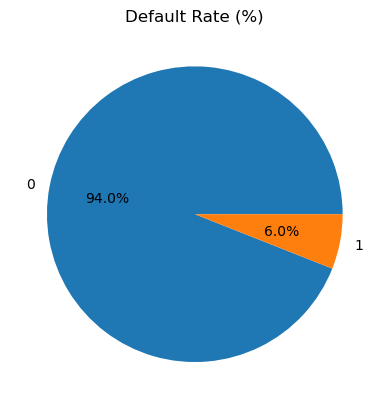

In [15]:
df.default.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Default Rate (%)")
plt.ylabel("")
plt.show()

# Data Preparation

## Missing

In [16]:
miss_tab = missing_values_table(df)

In [17]:
miss_tab

,Column,DatasetRow,ColumnRow,Missing,Percent
0,PropertyValuationMethod,629544,0,629544,100.000
1,ProgramIndicator,629544,0,629544,100.000
2,MetropolitanStatisticalAreaMSAOrMetropolitanDi...,629544,489742,139802,22.207
3,OriginalDebttoIncomeDTIRatio,629544,616336,13208,2.098
4,CreditScore,629544,628983,561,0.089
5,NumberofBorrowers,629544,629157,387,0.061
6,FirstTimeHomebuyerFlag,629544,629388,156,0.025
7,OriginalCombinedLoantoValueCLTV,629544,629493,51,0.008
8,OriginalLoantoValueLTV,629544,629498,46,0.007
9,Channel,629544,629542,2,0.000


### Drop Columns due to Huge Number of Missing

We can see that some variables are 100% missing in the model and we plan to remove them.

In [18]:
# df shape before dropping
df.shape

(629544, 30)

In [19]:
#drop fully missed columns
fullyMissed =[
    "PropertyValuationMethod",
    "ProgramIndicator"
]

#drop columns
df = df.drop(fullyMissed , axis = 1)

In [20]:
# df shape after dropping
df.shape

(629544, 28)

### Populate Missing

We will impute missing the numerical values with the 'mean', and the categorical values with the 'most frequent' words.

We will only impute values for variables that have less than 50% missing data.

In [21]:
miss_tab = missing_values_table(df)
miss_tab

,Column,DatasetRow,ColumnRow,Missing,Percent
0,MetropolitanStatisticalAreaMSAOrMetropolitanDi...,629544,489742,139802,22.207
1,OriginalDebttoIncomeDTIRatio,629544,616336,13208,2.098
2,CreditScore,629544,628983,561,0.089
3,NumberofBorrowers,629544,629157,387,0.061
4,FirstTimeHomebuyerFlag,629544,629388,156,0.025
5,OriginalCombinedLoantoValueCLTV,629544,629493,51,0.008
6,OriginalLoantoValueLTV,629544,629498,46,0.007
7,Channel,629544,629542,2,0.000
8,PropertyState,629544,629544,0,0.000
9,SellerName,629544,629544,0,0.000


In [22]:
# variables has less than %50 percent missing
miss_tab.loc[(miss_tab["Percent"]< 50) & (miss_tab["Missing"]> 0)].reset_index(drop =True) # varible to be populated

,Column,DatasetRow,ColumnRow,Missing,Percent
0,MetropolitanStatisticalAreaMSAOrMetropolitanDi...,629544,489742,139802,22.207
1,OriginalDebttoIncomeDTIRatio,629544,616336,13208,2.098
2,CreditScore,629544,628983,561,0.089
3,NumberofBorrowers,629544,629157,387,0.061
4,FirstTimeHomebuyerFlag,629544,629388,156,0.025
5,OriginalCombinedLoantoValueCLTV,629544,629493,51,0.008
6,OriginalLoantoValueLTV,629544,629498,46,0.007
7,Channel,629544,629542,2,0.000


In [23]:
#fil by mean
#fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["MetropolitanStatisticalAreaMSAOrMetropolitanDivision"],"mean", rounding=True)

In [24]:
#fil by mean
#fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["OriginalDebttoIncomeDTIRatio"],"mean", rounding=True)

In [25]:
#fil by mean
#fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["CreditScore"],"mean", rounding=True)

In [26]:
#fill by most frequent 
##fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["NumberofBorrowers"],"mode")

In [27]:
#fill by most frequent 
##fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["FirstTimeHomebuyerFlag"],"mode")

In [28]:
#fil by mean
#fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["OriginalCombinedLoantoValueCLTV"],"mean", rounding=True)

In [29]:
#fil by mean
#fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["OriginalLoantoValueLTV"],"mean", rounding=True)

In [30]:
#fil by mean
#fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["MortgageInsurancePercentageMI"],"mean", rounding=True)

In [31]:
#fill by most frequent 
##fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["NumberofUnits"],"mode")

In [32]:
#fill by most frequent 
##fill_missing_values(df, columns, bywhat, rounding=False)
fill_missing_values(df,["Channel"],"mode")

In [33]:
miss_tab = missing_values_table(df)
miss_tab

,Column,DatasetRow,ColumnRow,Missing,Percent
0,LoanSequenceNumber,629544,629544,0,0.0
1,CreditScore,629544,629544,0,0.0
2,dataflag,629544,629544,0,0.0
3,InterestOnlyIOIndicator,629544,629544,0,0.0
4,ServicerName,629544,629544,0,0.0
5,SellerName,629544,629544,0,0.0
6,NumberofBorrowers,629544,629544,0,0.0
7,OriginalLoanTerm,629544,629544,0,0.0
8,LoanPurpose,629544,629544,0,0.0
9,PostalCode,629544,629544,0,0.0


In [34]:
print("Check if there is any missing variables left")
df.isna().sum().sum()

Check if there is any missing variables left


0

## Casting

In [35]:
df.dtypes

LoanSequenceNumber                                       object
CreditScore                                             float64
FirstPaymentDate                                         object
FirstTimeHomebuyerFlag                                   object
MaturityDate                                             object
MetropolitanStatisticalAreaMSAOrMetropolitanDivision    float64
MortgageInsurancePercentageMI                             int64
NumberofUnits                                             int64
OccupancyStatus                                          object
OriginalCombinedLoantoValueCLTV                         float64
OriginalDebttoIncomeDTIRatio                            float64
OriginalUPB                                               int64
OriginalLoantoValueLTV                                  float64
OriginalInterestRate                                    float64
Channel                                                  object
PrepaymentPenaltyMortgagePPMFlag        

In [36]:
df.dtypes.value_counts()

object     15
float64     7
int64       6
Name: count, dtype: int64

In [37]:
# Convert MortgageInsurancePercentageMI to int
df["MortgageInsurancePercentageMI"]=df["MortgageInsurancePercentageMI"].astype(int)

In [38]:
# Convert Number of Units to object
df["NumberofUnits"]=df["NumberofUnits"].astype(str)

In [39]:
#convert OriginalInterestRate to float
df["OriginalInterestRate"]=df["OriginalInterestRate"].astype(float)

In [40]:
df.dtypes

LoanSequenceNumber                                       object
CreditScore                                             float64
FirstPaymentDate                                         object
FirstTimeHomebuyerFlag                                   object
MaturityDate                                             object
MetropolitanStatisticalAreaMSAOrMetropolitanDivision    float64
MortgageInsurancePercentageMI                             int64
NumberofUnits                                            object
OccupancyStatus                                          object
OriginalCombinedLoantoValueCLTV                         float64
OriginalDebttoIncomeDTIRatio                            float64
OriginalUPB                                               int64
OriginalLoantoValueLTV                                  float64
OriginalInterestRate                                    float64
Channel                                                  object
PrepaymentPenaltyMortgagePPMFlag        

In [41]:
df.dtypes.value_counts()

object     16
float64     7
int64       5
Name: count, dtype: int64

## Drop Columns

We are discarding columns that we deem irrelevant for our analytical purpose.

In [42]:
# df shape before dropping
df.shape

(629544, 28)

In [43]:
#drop dataflag
df.drop(columns=["dataflag"], inplace=True)

In [44]:
dropColumns = [
     
         'MaturityDate', #not exist during application normally
         'FirstPaymentDate', #not exist during application normally
         'LoanSequenceNumber', #id number of loan
         'SellerName', # not info at application time also it has been masked
         'ServicerName', # not info at application time also it has been masked
         'PostalCode' # drop PostalCode we will rather create dummy variables for state
                      # # Additioanly PostalCode has been masked doesn't reflect exact position

]

In [45]:
df.drop(columns=dropColumns, inplace=True)

In [46]:
# df shape after dropping
df.shape

(629544, 21)

## Categorical and Numerical Split

In this section, we are dividing our variables into categorical and numerical types.

In [47]:
catCols,numCols,targetCol = SplitVariables(df,"default")

################ Numerical Columns ##############
Number of Numerical Variables 10

 1 :  CreditScore
 2 :  MetropolitanStatisticalAreaMSAOrMetropolitanDivision
 3 :  MortgageInsurancePercentageMI
 4 :  OriginalCombinedLoantoValueCLTV
 5 :  OriginalDebttoIncomeDTIRatio
 6 :  OriginalUPB
 7 :  OriginalLoantoValueLTV
 8 :  OriginalInterestRate
 9 :  OriginalLoanTerm
 10 :  NumberofBorrowers

############### Categorical Columns ##############
Number of Categorical Variables 10

 1 : FirstTimeHomebuyerFlag
 2 : NumberofUnits
 3 : OccupancyStatus
 4 : Channel
 5 : PrepaymentPenaltyMortgagePPMFlag
 6 : AmortizationTypeFormerlyProductType
 7 : PropertyState
 8 : PropertyType
 9 : LoanPurpose
 10 : InterestOnlyIOIndicator

############### Target Variable #################

default

###################################################


In [48]:
print("Numeric Columns")
print(numCols)
print("\nCategorical Columns")
print(catCols)

Numeric Columns
['CreditScore', 'MetropolitanStatisticalAreaMSAOrMetropolitanDivision', 'MortgageInsurancePercentageMI', 'OriginalCombinedLoantoValueCLTV', 'OriginalDebttoIncomeDTIRatio', 'OriginalUPB', 'OriginalLoantoValueLTV', 'OriginalInterestRate', 'OriginalLoanTerm', 'NumberofBorrowers']

Categorical Columns
['FirstTimeHomebuyerFlag', 'NumberofUnits', 'OccupancyStatus', 'Channel', 'PrepaymentPenaltyMortgagePPMFlag', 'AmortizationTypeFormerlyProductType', 'PropertyState', 'PropertyType', 'LoanPurpose', 'InterestOnlyIOIndicator']


In [49]:
print("If it is TRUE splitted correctly")
df.shape[1]  == len(catCols) +len(numCols) + 1

If it is TRUE splitted correctly


True

## Frequency of Dataset

We are eliminating the categorical columns that have only one unique (constant) value.

We are removing categorical columns in which the frequency of one particular instance considerably dominates the others. We view such scenarios as essentially having a constant instance.

In [50]:
print("\nCategorical Variables Unique Values\n")
print(df[catCols].apply(lambda col: col.unique()))
print()
print(df[catCols].apply(lambda col: col.nunique()))


Categorical Variables Unique Values

FirstTimeHomebuyerFlag                                                            [Y, N]
NumberofUnits                                                               [1, 2, 4, 3]
OccupancyStatus                                                                [P, I, S]
Channel                                                                           [T, R]
PrepaymentPenaltyMortgagePPMFlag                                                  [N, Y]
AmortizationTypeFormerlyProductType                                                [FRM]
PropertyState                          [PA, CA, NC, WA, OH, KY, FL, NV, TN, AZ, ID, N...
PropertyType                                                        [SF, MH, PU, CO, CP]
LoanPurpose                                                                    [P, C, N]
InterestOnlyIOIndicator                                                              [N]
dtype: object

FirstTimeHomebuyerFlag                  2
NumberofUnits  

<Axes: >

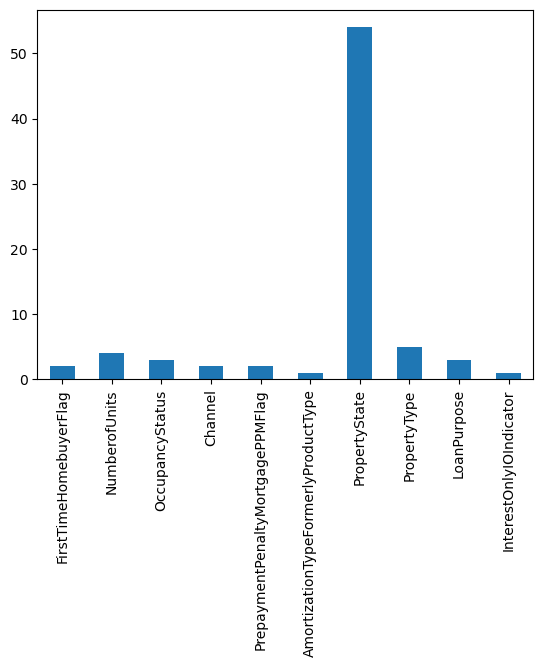

In [51]:
df[catCols].apply(lambda col:col.nunique()).plot(kind='bar')

### Drop has columns due to a constant in a variable


In [52]:
# df shape before dropping
df.shape

(629544, 21)

In [53]:
# Variable which has constant
constantfreq = df[catCols].apply(lambda col: col.nunique()).index[np.argwhere(df[catCols].apply(lambda col: col.nunique()).values<=1).ravel()].to_list()

In [54]:
constantfreq

['AmortizationTypeFormerlyProductType', 'InterestOnlyIOIndicator']

In [55]:
df = df.drop(constantfreq, axis = 1)

In [56]:
# df shape after dropping
df.shape

(629544, 19)

In [57]:
catCols

['FirstTimeHomebuyerFlag',
 'NumberofUnits',
 'OccupancyStatus',
 'Channel',
 'PrepaymentPenaltyMortgagePPMFlag',
 'AmortizationTypeFormerlyProductType',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'InterestOnlyIOIndicator']

In [58]:
# The count of categorical columns in our dataset.
len(catCols)

10

In [59]:
#Remove constantfreq from catCols
for col in constantfreq:
    catCols.remove(col)

In [60]:
catCols

['FirstTimeHomebuyerFlag',
 'NumberofUnits',
 'OccupancyStatus',
 'Channel',
 'PrepaymentPenaltyMortgagePPMFlag',
 'PropertyState',
 'PropertyType',
 'LoanPurpose']

In [61]:
#The count of categorical columns in our dataset.
len(catCols)

8

In [62]:
for var in catCols:  #for categorical
    display(((pd.crosstab(df[targetCol], df[var], margins=True) / df.shape[0]) * 100).round(1))

FirstTimeHomebuyerFlag,N,Y,All
default,,,
0,82.4,11.6,94.0
1,5.3,0.7,6.0
All,87.6,12.4,100.0


NumberofUnits,1,2,3,4,All
default,,,,,
0,91.6,1.8,0.3,0.3,94.0
1,5.8,0.1,0.0,0.0,6.0
All,97.4,2.0,0.3,0.3,100.0


OccupancyStatus,I,P,S,All
default,,,,
0,7.0,82.2,4.9,94.0
1,0.5,5.3,0.2,6.0
All,7.4,87.5,5.1,100.0


Channel,R,T,All
default,,,
0,42.7,51.3,94.0
1,1.9,4.1,6.0
All,44.7,55.3,100.0


PrepaymentPenaltyMortgagePPMFlag,N,Y,All
default,,,
0,94.0,0.0,94.0
1,6.0,0.0,6.0
All,100.0,0.0,100.0


PropertyState,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY,All
default,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.3,1.4,1.0,2.7,6.4,2.0,0.9,0.1,0.4,6.0,3.4,0.0,0.3,1.0,0.7,4.5,2.3,0.9,1.4,1.1,1.7,2.0,0.4,3.3,2.4,2.3,0.5,0.4,3.5,0.2,0.6,0.5,2.3,0.7,0.9,3.8,3.6,1.2,1.9,3.8,0.4,0.3,1.6,0.2,1.9,6.8,1.3,2.7,0.0,0.3,2.9,2.1,0.4,0.2,94.0
1,0.0,0.1,0.0,0.3,0.6,0.1,0.1,0.0,0.0,0.9,0.2,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0.1,0.1,0.1,0.2,0.0,0.2,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.2,0.0,0.1,0.2,0.2,0.0,0.1,0.2,0.0,0.0,0.1,0.0,0.1,0.2,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,6.0
All,0.3,1.5,1.0,3.1,7.1,2.0,1.0,0.1,0.4,6.9,3.6,0.0,0.3,1.1,0.8,4.8,2.5,0.9,1.5,1.2,1.8,2.1,0.4,3.5,2.6,2.4,0.6,0.4,3.7,0.2,0.6,0.5,2.5,0.8,1.0,3.9,3.8,1.2,1.9,4.0,0.4,0.3,1.7,0.2,2.0,7.0,1.4,2.8,0.0,0.3,3.0,2.2,0.5,0.2,100.0


PropertyType,CO,CP,MH,PU,SF,All
default,,,,,,
0,8.3,0.3,1.4,13.8,70.3,94.0
1,0.5,0.0,0.1,0.8,4.6,6.0
All,8.8,0.3,1.4,14.6,74.8,100.0


LoanPurpose,C,N,P,All
default,,,,
0,35.1,16.5,42.4,94.0
1,2.4,1.3,2.3,6.0
All,37.6,17.8,44.6,100.0


In [63]:
df.stb.freq(['PrepaymentPenaltyMortgagePPMFlag'])

,PrepaymentPenaltyMortgagePPMFlag,count,percent,cumulative_count,cumulative_percent
0,N,629276,99.95743,629276,99.95743
1,Y,268,0.04257,629544,100.00000


In [64]:
# df shape before dropping
df.shape

(629544, 19)

In [65]:
df = df.drop(['PrepaymentPenaltyMortgagePPMFlag'], axis = 1)

In [66]:
# df shape after dropping
df.shape

(629544, 18)

In [67]:
# number of cat cols before dropping
len(catCols)

8

In [68]:
#drop PrepaymentPenaltyMortgagePPMFlag from catCols
catCols.remove('PrepaymentPenaltyMortgagePPMFlag')

In [69]:
# number of cat cols after dropping
len(catCols)

7

In [70]:
# assertion
df.shape[1]  == len(catCols) +len(numCols) + 1

True

Display the current variables.

In [71]:
    print("################ Numerical Columns ##############")
    print(f"Number of Numerical Variables {len(numCols)}\n")
    for idx in range(len(numCols)):
      print(f" {idx+1} :  {numCols[idx]}")

    print("\n############### Categorical Columns ##############")
    print(f"Number of Categorical Variables {len(catCols)}\n")
    for idx in range(len(catCols)):
      print(f" {idx+1} : {catCols[idx]}")

    print("\n############### Target Variable #################\n")
    print(targetCol)
    print("\n###################################################")

################ Numerical Columns ##############
Number of Numerical Variables 10

 1 :  CreditScore
 2 :  MetropolitanStatisticalAreaMSAOrMetropolitanDivision
 3 :  MortgageInsurancePercentageMI
 4 :  OriginalCombinedLoantoValueCLTV
 5 :  OriginalDebttoIncomeDTIRatio
 6 :  OriginalUPB
 7 :  OriginalLoantoValueLTV
 8 :  OriginalInterestRate
 9 :  OriginalLoanTerm
 10 :  NumberofBorrowers

############### Categorical Columns ##############
Number of Categorical Variables 7

 1 : FirstTimeHomebuyerFlag
 2 : NumberofUnits
 3 : OccupancyStatus
 4 : Channel
 5 : PropertyState
 6 : PropertyType
 7 : LoanPurpose

############### Target Variable #################

default

###################################################


## Collinearity

We're going to remove variables that have over 70% collinearity.

#### Numerical

In [72]:
CorrAbs = df[numCols].corr('kendall').abs()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

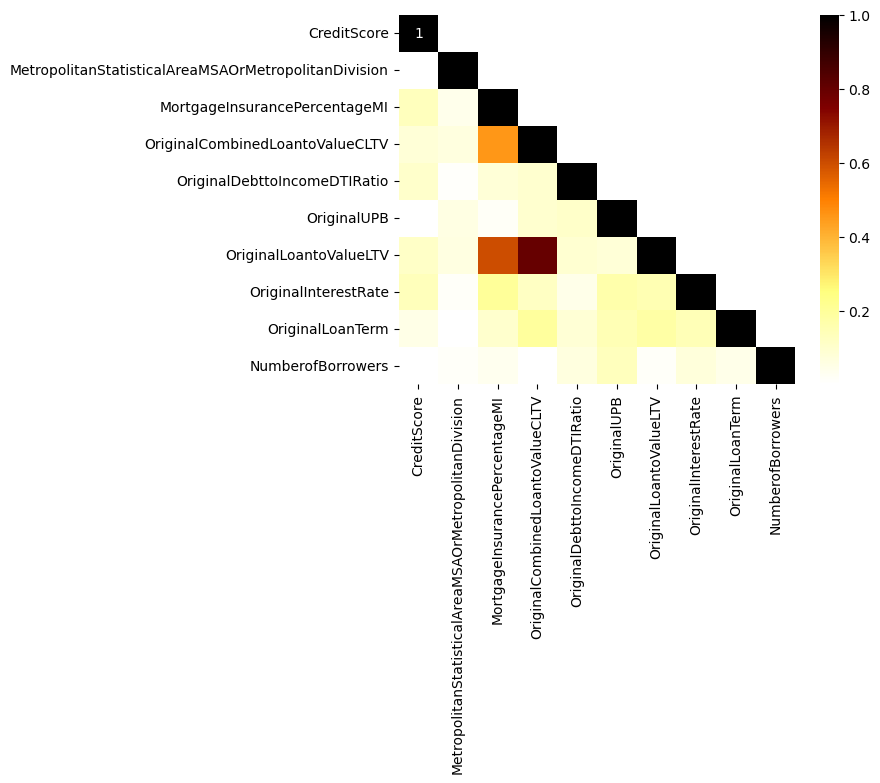

In [73]:
import seaborn as sns
sns.heatmap(CorrAbs.where(np.tril(np.ones(CorrAbs.shape)).astype(bool)), cmap ="afmhot_r", annot = True)

In [74]:
# Create a boolean mask for the upper triangle of the matrix
upper_mask = CorrAbs.where(np.triu(np.ones(CorrAbs.shape), k=1).astype(bool))

# Find the pairs of variables with a correlation coefficient greater than 0.7
corr_pairs = [(i, j, CorrAbs.loc[i,j]) for i in upper_mask.columns for j in upper_mask.columns if upper_mask.loc[i,j] > 0.7]

# Print the variable pairs and their correlation coefficients
print('************************"Variable pairs with correlation > 0.7:******************************')

for pair in corr_pairs:
    print(pair[0], " and ", pair[1], ": ", round(pair[2],3))

print()
print('************************"Counter******************************')
from collections import Counter
pair_variable = [pair[0] for pair in corr_pairs] + [pair[1] for pair in corr_pairs] 
counted_list = Counter(pair_variable)
sorted_list = counted_list.most_common()

for i in sorted_list:
    print(i)

************************"Variable pairs with correlation > 0.7:******************************
OriginalCombinedLoantoValueCLTV  and  OriginalLoantoValueLTV :  0.8

************************"Counter******************************
('OriginalCombinedLoantoValueCLTV', 1)
('OriginalLoantoValueLTV', 1)


In [75]:
# df shape before dropping
df.shape

(629544, 18)

In [76]:
#drop OriginalCombinedLoantoValueCLTV as it has low gini index found via Logistic
df = df.drop(['OriginalCombinedLoantoValueCLTV'], axis = 1)

In [77]:
# df shape after dropping
df.shape

(629544, 17)

### Categorical 

In [78]:
catCols

['FirstTimeHomebuyerFlag',
 'NumberofUnits',
 'OccupancyStatus',
 'Channel',
 'PropertyState',
 'PropertyType',
 'LoanPurpose']

In [79]:
from pycorrcat.pycorrcat import plot_corr, corr_matrix

In [80]:
import itertools
PermComb2 = list(itertools.combinations(catCols, 2))

In [81]:
PermComb2

[('FirstTimeHomebuyerFlag', 'NumberofUnits'),
 ('FirstTimeHomebuyerFlag', 'OccupancyStatus'),
 ('FirstTimeHomebuyerFlag', 'Channel'),
 ('FirstTimeHomebuyerFlag', 'PropertyState'),
 ('FirstTimeHomebuyerFlag', 'PropertyType'),
 ('FirstTimeHomebuyerFlag', 'LoanPurpose'),
 ('NumberofUnits', 'OccupancyStatus'),
 ('NumberofUnits', 'Channel'),
 ('NumberofUnits', 'PropertyState'),
 ('NumberofUnits', 'PropertyType'),
 ('NumberofUnits', 'LoanPurpose'),
 ('OccupancyStatus', 'Channel'),
 ('OccupancyStatus', 'PropertyState'),
 ('OccupancyStatus', 'PropertyType'),
 ('OccupancyStatus', 'LoanPurpose'),
 ('Channel', 'PropertyState'),
 ('Channel', 'PropertyType'),
 ('Channel', 'LoanPurpose'),
 ('PropertyState', 'PropertyType'),
 ('PropertyState', 'LoanPurpose'),
 ('PropertyType', 'LoanPurpose')]

In [82]:
for col1,col2 in PermComb2:
  print(f"#################### Correlation Between {col1} and {col2} ####################")
  print(corr_matrix(df, [col1, col2]))

#################### Correlation Between FirstTimeHomebuyerFlag and NumberofUnits ####################
                        FirstTimeHomebuyerFlag  NumberofUnits
FirstTimeHomebuyerFlag                1.000000       0.030619
NumberofUnits                         0.030619       1.000000
#################### Correlation Between FirstTimeHomebuyerFlag and OccupancyStatus ####################
                        FirstTimeHomebuyerFlag  OccupancyStatus
FirstTimeHomebuyerFlag                1.000000         0.141995
OccupancyStatus                       0.141995         1.000000
#################### Correlation Between FirstTimeHomebuyerFlag and Channel ####################
                        FirstTimeHomebuyerFlag   Channel
FirstTimeHomebuyerFlag                1.000000  0.015599
Channel                               0.015599  1.000000
#################### Correlation Between FirstTimeHomebuyerFlag and PropertyState ####################
                        FirstTimeHomebuyerF

# Final Dataset for Modeling 

In [83]:
print(df.shape)

(629544, 17)


In [84]:
print("################ Final Variables ##############")
for idx in range(len(df.columns.to_list())):
  print(f" {idx+1} :  {df.columns.to_list()[idx]}")

print(f"\nNumber of variables: {df.shape[1]}")

################ Final Variables ##############
 1 :  CreditScore
 2 :  FirstTimeHomebuyerFlag
 3 :  MetropolitanStatisticalAreaMSAOrMetropolitanDivision
 4 :  MortgageInsurancePercentageMI
 5 :  NumberofUnits
 6 :  OccupancyStatus
 7 :  OriginalDebttoIncomeDTIRatio
 8 :  OriginalUPB
 9 :  OriginalLoantoValueLTV
 10 :  OriginalInterestRate
 11 :  Channel
 12 :  PropertyState
 13 :  PropertyType
 14 :  LoanPurpose
 15 :  OriginalLoanTerm
 16 :  NumberofBorrowers
 17 :  default

Number of variables: 17


## Encoding Categorical Variables

We are employing LabelEncoder for categorical variables with just two unique values and using dummy variables for those with more than two unique values.

In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder() # creating instance of labelencoder

In [86]:
catCols,numCols,targetCol = SplitVariables(df,"default")

################ Numerical Columns ##############
Number of Numerical Variables 9

 1 :  CreditScore
 2 :  MetropolitanStatisticalAreaMSAOrMetropolitanDivision
 3 :  MortgageInsurancePercentageMI
 4 :  OriginalDebttoIncomeDTIRatio
 5 :  OriginalUPB
 6 :  OriginalLoantoValueLTV
 7 :  OriginalInterestRate
 8 :  OriginalLoanTerm
 9 :  NumberofBorrowers

############### Categorical Columns ##############
Number of Categorical Variables 7

 1 : FirstTimeHomebuyerFlag
 2 : NumberofUnits
 3 : OccupancyStatus
 4 : Channel
 5 : PropertyState
 6 : PropertyType
 7 : LoanPurpose

############### Target Variable #################

default

###################################################


In [87]:
print(df[catCols].apply(lambda col: col.unique()))
print()
print(df[catCols].apply(lambda col: col.nunique()))

unique_counts = []
for col in df[catCols]:
    unique_counts.append(df[col].nunique())


print(f"Variables to be get dummied :  {sum([1 if i>2 else 0 for i in unique_counts])}")
print(f"Variables to be Label Encoded :  {sum([1 if i<=2 else 0 for i in unique_counts])}")
print(f"After Encoding It will be {sum([i if i>2 else 0 for i in unique_counts]) + df.shape[1] - sum([1 if i>2 else 0 for i in unique_counts]) } variables")


FirstTimeHomebuyerFlag                                               [Y, N]
NumberofUnits                                                  [1, 2, 4, 3]
OccupancyStatus                                                   [P, I, S]
Channel                                                              [T, R]
PropertyState             [PA, CA, NC, WA, OH, KY, FL, NV, TN, AZ, ID, N...
PropertyType                                           [SF, MH, PU, CO, CP]
LoanPurpose                                                       [P, C, N]
dtype: object

FirstTimeHomebuyerFlag     2
NumberofUnits              4
OccupancyStatus            3
Channel                    2
PropertyState             54
PropertyType               5
LoanPurpose                3
dtype: int64
Variables to be get dummied :  5
Variables to be Label Encoded :  2
After Encoding It will be 81 variables


In [88]:
getDum = []
LabelEncode = []


for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) > 2:
            getDum.append(col)
        else:
            labelencoder.fit(df[col])
            df[col] = labelencoder.transform(df[col]) #it will covert directly don't need to drop and concat
            LabelEncode.append(col)

print(f'{len(getDum)} columns Get Dummied.\n')
print(getDum)
print(f'\n{len(LabelEncode)} columns Label Encoded.\n')
print(LabelEncode)

dummLev = pd.get_dummies(df[getDum])

#drop categorical 
df = df.drop(getDum, axis=1)

#New dataset
#Concat getDum
df= pd.concat([df,dummLev],axis=1)  #concat horizontially

print(f"\nThere are {df.shape[0]} rows ad {df.shape[1]} columns ")

5 columns Get Dummied.

['NumberofUnits', 'OccupancyStatus', 'PropertyState', 'PropertyType', 'LoanPurpose']

2 columns Label Encoded.

['FirstTimeHomebuyerFlag', 'Channel']

There are 629544 rows ad 81 columns 


## Split dataset into X and Y

In [89]:
# Split Dataset into X and Y
X = df.drop('default', axis=1)
y = df['default']

In [90]:
print(df.shape)
print(X.shape)
print(y.shape)

(629544, 81)
(629544, 80)
(629544,)


In [91]:
#The count of defaults.
y.value_counts()

default
0    591775
1     37769
Name: count, dtype: int64

In [92]:
#The percentages of defaults.
y.value_counts(normalize = True)

default
0    0.940006
1    0.059994
Name: proportion, dtype: float64

In [93]:
df.stb.freq(["default"])

,default,count,percent,cumulative_count,cumulative_percent
0,0,591775,94.000578,591775,94.000578
1,1,37769,5.999422,629544,100.000000


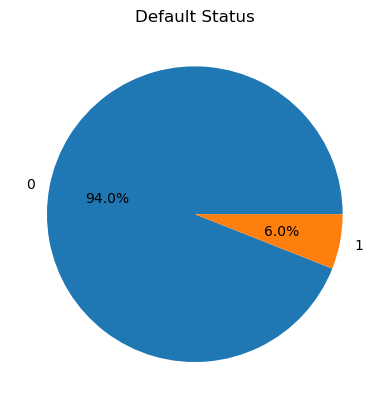

In [94]:
df.default.value_counts().plot.pie(autopct="%1.1f%%")
# add a title and axis labels
plt.title("Default Status")
plt.ylabel("")
plt.show()

## Split dataset into Train and Test

The dataset is divided into a training set and a test set with 70% and 30% ratios, respectively

In [95]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y,shuffle = True)

# print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (440680, 80)
y_train shape: (440680,)
X_test shape: (188864, 80)
y_test shape: (188864,)


In [96]:
y_train.value_counts()

default
0    414242
1     26438
Name: count, dtype: int64

In [97]:
y_train.value_counts(normalize=True)

default
0    0.940006
1    0.059994
Name: proportion, dtype: float64

In [98]:
y_test.value_counts()

default
0    177533
1     11331
Name: count, dtype: int64

In [99]:
y_test.value_counts(normalize=True)

default
0    0.940004
1    0.059996
Name: proportion, dtype: float64

## Undersampling

we performed undersampling technique in order to alleviate the impact of the imbalanced dataset problem.

In [100]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

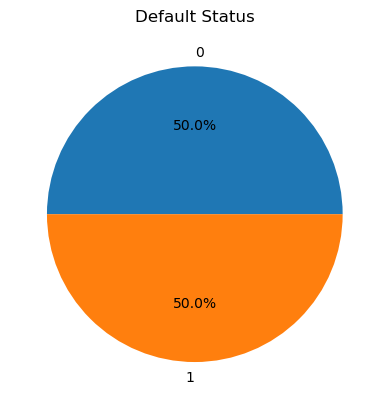

In [101]:
y_resampled.value_counts().plot.pie(autopct="%1.1f%%")
# add a title and axis labels
plt.title("Default Status")
plt.ylabel("")
plt.show()

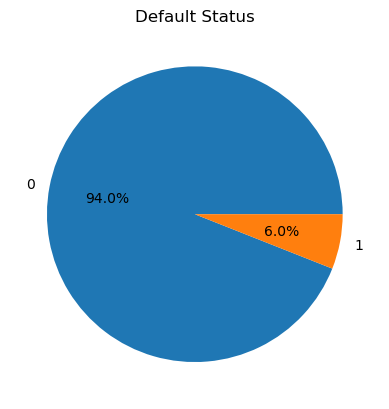

In [102]:
y_test.value_counts().plot.pie(autopct="%1.1f%%")
# add a title and axis labels
plt.title("Default Status")
plt.ylabel("")
plt.show()

In [103]:
#Assign Resamples to trains
X_train = X_resampled.copy()
y_train = y_resampled.copy()

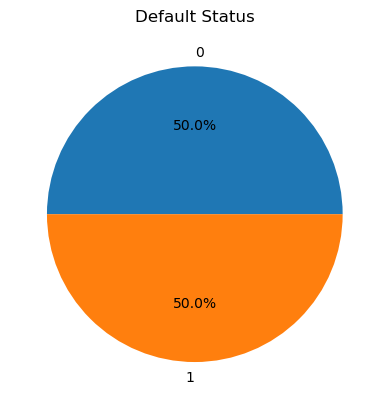

In [104]:
y_train.value_counts().plot.pie(autopct="%1.1f%%")
# add a title and axis labels
plt.title("Default Status")
plt.ylabel("")
plt.show()

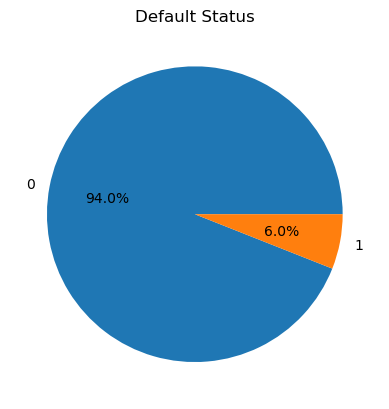

In [105]:
y_test.value_counts().plot.pie(autopct="%1.1f%%")
# add a title and axis labels
plt.title("Default Status")
plt.ylabel("")
plt.show()

### After Undersampling data size

In [106]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52876, 80)
y_train shape: (52876,)
X_test shape: (188864, 80)
y_test shape: (188864,)


In [107]:
y_train.value_counts()

default
0    26438
1    26438
Name: count, dtype: int64

In [108]:
y_train.value_counts(normalize=True)

default
0    0.5
1    0.5
Name: proportion, dtype: float64

In [109]:
y_test.value_counts()

default
0    177533
1     11331
Name: count, dtype: int64

In [110]:
y_test.value_counts(normalize=True)

default
0    0.940004
1    0.059996
Name: proportion, dtype: float64

# Save dataset for Algorithms

In [111]:
path

'/Users/Adnan_Sevinc/Library/CloudStorage/OneDrive-EPAM/adnan_sevinc_personal/GitHub/A-case-study-DS/dataset'

In [112]:
with open(os.path.join(path,'X_train.csv'), 'w', encoding = 'utf-8-sig') as f:
  X_train.to_csv(f,index=False)

In [113]:
with open(os.path.join(path,'y_train.csv'), 'w', encoding = 'utf-8-sig') as f:
  y_train.to_csv(f,index=False)

In [114]:
with open(os.path.join(path,'X_test.csv'), 'w', encoding = 'utf-8-sig') as f:
  X_test.to_csv(f,index=False)

In [115]:
with open(os.path.join(path,'y_test.csv'), 'w', encoding = 'utf-8-sig') as f:
  y_test.to_csv(f,index=False)